In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
targets = ["target_CHEMBL240",
          "target_CHEMBL260",
          "target_CHEMBL279"]

methods = ["RF", "xgboost", "MLP"]

sorting_vars = ["logp"]

In [3]:



# Define a function to calculate metrics
def calculate_metrics(group):
    total_compounds = len(group)
    low_error_count = sum(abs(group['True Values'] - group['Predictions']) <= 0.5)
    discovery_yield = low_error_count / total_compounds if total_compounds > 0 else 0
    return pd.Series({
        'Total Ideal Compounds': total_compounds,
        'Low Error Count': low_error_count,
        'Discovery Yield': discovery_yield
    })



In [4]:
all_results = pd.DataFrame()

# Loop through each configuration
for target in targets:
    for var in sorting_vars:
        for method in methods:
            print("sortedFCV")
            print(target)
            print(method)
            print(var)

            # Load the DataFrame from a CSV file
            df = pd.read_csv(f"../{target}-1_results/{var}_sorted_fcv_results_{method}_testing batches.csv")
    
            if (target == "target_CHEMBL240"):
                disc_yld = df[df["True Values"] < 5.2]
                
            if (target != "target_CHEMBL240"):
                disc_yld = df[df["True Values"] > 7.0]
            
            # Group by Testing Batch and apply the function
            batch_metrics = disc_yld.groupby('testing batch').apply(calculate_metrics).reset_index()
            # Calculate the maximum number of compounds in any batch
            max_compounds = batch_metrics['Total Ideal Compounds'].max()

            # Standardize the discovery yield
            batch_metrics['Standardized Discovery Yield'] = batch_metrics['Discovery Yield'] * (max_compounds / batch_metrics['Total Ideal Compounds'])
            batch_metrics['Target'] = target
            batch_metrics['Variable'] = var
            batch_metrics['Method'] = method
            batch_metrics['evalt'] = "sorted_fcv"

            # Append results
            all_results = pd.concat([all_results, batch_metrics], ignore_index=True)


# Optionally, save all results to a single CSV file
all_results.to_csv('dy_sorted_fcv_discovery_yield_results.csv', index=False)
all_results

sortedFCV
target_CHEMBL240
RF
logp
sortedFCV
target_CHEMBL240
xgboost
logp
sortedFCV
target_CHEMBL240
MLP
logp
sortedFCV
target_CHEMBL260
RF
logp
sortedFCV
target_CHEMBL260
xgboost
logp
sortedFCV
target_CHEMBL260
MLP
logp
sortedFCV
target_CHEMBL279
RF
logp
sortedFCV
target_CHEMBL279
xgboost
logp
sortedFCV
target_CHEMBL279
MLP
logp


,testing batch,Total Ideal Compounds,Low Error Count,Discovery Yield,Standardized Discovery Yield,Target,Variable,Method,evalt
0,1,21.0,11.0,0.523810,1.995465,target_CHEMBL240,logp,RF,sorted_fcv
1,2,37.0,18.0,0.486486,1.051863,target_CHEMBL240,logp,RF,sorted_fcv
2,3,24.0,9.0,0.375000,1.250000,target_CHEMBL240,logp,RF,sorted_fcv
3,4,43.0,18.0,0.418605,0.778799,target_CHEMBL240,logp,RF,sorted_fcv
4,5,44.0,17.0,0.386364,0.702479,target_CHEMBL240,logp,RF,sorted_fcv
...,...,...,...,...,...,...,...,...,...
76,5,73.0,32.0,0.438356,0.630512,target_CHEMBL279,logp,MLP,sorted_fcv
77,6,69.0,32.0,0.463768,0.705734,target_CHEMBL279,logp,MLP,sorted_fcv
78,7,71.0,30.0,0.422535,0.624876,target_CHEMBL279,logp,MLP,sorted_fcv
79,8,78.0,25.0,0.320513,0.431460,target_CHEMBL279,logp,MLP,sorted_fcv


In [5]:
all_results = pd.DataFrame()

# Loop through each configuration
for target in targets:
    for method in methods:
        print("sortedFCV")
        print(target)
        print(method)
        print(var)

        # Load the DataFrame from a CSV file
        df = pd.read_csv(f"../{target}-1_results/unsorted_fcv_results_{method}_testing batches.csv")

        if (target == "target_CHEMBL240"):
            disc_yld = df[df["True Values"] < 5.2]

        if (target != "target_CHEMBL240"):
            disc_yld = df[df["True Values"] > 7.0]

        # Group by Testing Batch and apply the function
        batch_metrics = disc_yld.groupby('testing batch').apply(calculate_metrics).reset_index()
        # Calculate the maximum number of compounds in any batch
        max_compounds = batch_metrics['Total Ideal Compounds'].max()

        # Standardize the discovery yield
        batch_metrics['Standardized Discovery Yield'] = batch_metrics['Discovery Yield'] * (max_compounds / batch_metrics['Total Ideal Compounds'])
        batch_metrics['Target'] = target
        batch_metrics['Method'] = method
        batch_metrics['evalt'] = "unsorted_fcv"

        # Append results
        all_results = pd.concat([all_results, batch_metrics], ignore_index=True)


# Optionally, save all results to a single CSV file
all_results.to_csv('dy_unsorted_fcv_discovery_yield_results.csv', index=False)
all_results

sortedFCV
target_CHEMBL240
RF
logp
sortedFCV
target_CHEMBL240
xgboost
logp
sortedFCV
target_CHEMBL240
MLP
logp
sortedFCV
target_CHEMBL260
RF
logp
sortedFCV
target_CHEMBL260
xgboost
logp
sortedFCV
target_CHEMBL260
MLP
logp
sortedFCV
target_CHEMBL279
RF
logp
sortedFCV
target_CHEMBL279
xgboost
logp
sortedFCV
target_CHEMBL279
MLP
logp


,testing batch,Total Ideal Compounds,Low Error Count,Discovery Yield,Standardized Discovery Yield,Target,Method,evalt
0,1,39.0,28.0,0.717949,1.049310,target_CHEMBL240,RF,unsorted_fcv
1,2,57.0,38.0,0.666667,0.666667,target_CHEMBL240,RF,unsorted_fcv
2,3,49.0,30.0,0.612245,0.712203,target_CHEMBL240,RF,unsorted_fcv
3,4,48.0,19.0,0.395833,0.470052,target_CHEMBL240,RF,unsorted_fcv
4,5,33.0,18.0,0.545455,0.942149,target_CHEMBL240,RF,unsorted_fcv
...,...,...,...,...,...,...,...,...
76,5,88.0,51.0,0.579545,0.619060,target_CHEMBL279,MLP,unsorted_fcv
77,6,87.0,49.0,0.563218,0.608535,target_CHEMBL279,MLP,unsorted_fcv
78,7,86.0,47.0,0.546512,0.597350,target_CHEMBL279,MLP,unsorted_fcv
79,8,82.0,32.0,0.390244,0.447353,target_CHEMBL279,MLP,unsorted_fcv


In [6]:
all_results = pd.DataFrame()

# Loop through each configuration
for target in targets:
    for method in methods:
        print("sortedFCV")
        print(target)
        print(method)
        print(var)

        # Load the DataFrame from a CSV file
        df = pd.read_csv(f"../{target}-1_results/cv_results_{method}_testing batches.csv")

        if (target == "target_CHEMBL240"):
            disc_yld = df[df["True Values"] < 5.2]

        if (target != "target_CHEMBL240"):
            disc_yld = df[df["True Values"] > 7.0]

        # Group by Testing Batch and apply the function
        batch_metrics = disc_yld.groupby('testing batch').apply(calculate_metrics).reset_index()
        # Calculate the maximum number of compounds in any batch
        max_compounds = batch_metrics['Total Ideal Compounds'].max()

        # Standardize the discovery yield
        batch_metrics['Standardized Discovery Yield'] = batch_metrics['Discovery Yield'] * (max_compounds / batch_metrics['Total Ideal Compounds'])
        batch_metrics['Target'] = target
        batch_metrics['Method'] = method
        batch_metrics['evalt'] = "cv"

        # Append results
        all_results = pd.concat([all_results, batch_metrics], ignore_index=True)


# Optionally, save all results to a single CSV file
all_results.to_csv('dy_cv_discovery_yield_results.csv', index=False)
all_results

sortedFCV
target_CHEMBL240
RF
logp
sortedFCV
target_CHEMBL240
xgboost
logp
sortedFCV
target_CHEMBL240
MLP
logp
sortedFCV
target_CHEMBL260
RF
logp
sortedFCV
target_CHEMBL260
xgboost
logp
sortedFCV
target_CHEMBL260
MLP
logp
sortedFCV
target_CHEMBL279
RF
logp
sortedFCV
target_CHEMBL279
xgboost
logp
sortedFCV
target_CHEMBL279
MLP
logp


,testing batch,Total Ideal Compounds,Low Error Count,Discovery Yield,Standardized Discovery Yield,Target,Method,evalt
0,1,51.0,40.0,0.784314,0.845829,target_CHEMBL240,RF,cv
1,2,41.0,31.0,0.756098,1.014277,target_CHEMBL240,RF,cv
2,3,55.0,40.0,0.727273,0.727273,target_CHEMBL240,RF,cv
3,4,52.0,36.0,0.692308,0.732249,target_CHEMBL240,RF,cv
4,5,51.0,42.0,0.823529,0.888120,target_CHEMBL240,RF,cv
...,...,...,...,...,...,...,...,...
85,6,82.0,48.0,0.585366,0.678168,target_CHEMBL279,MLP,cv
86,7,86.0,53.0,0.616279,0.680773,target_CHEMBL279,MLP,cv
87,8,89.0,53.0,0.595506,0.635652,target_CHEMBL279,MLP,cv
88,9,87.0,51.0,0.586207,0.640111,target_CHEMBL279,MLP,cv


In [7]:
all_results = pd.DataFrame()

# Loop through each configuration
for target in targets:
    for method in methods:
        print("sortedFCV")
        print(target)
        print(method)
        print(var)

        # Load the DataFrame from a CSV file
        df = pd.read_csv(f"../{target}-1_results/scaffold_cv_results_{method}_testing batches.csv")

        if (target == "target_CHEMBL240"):
            disc_yld = df[df["True Values"] < 5.2]

        if (target != "target_CHEMBL240"):
            disc_yld = df[df["True Values"] > 7.0]

        # Group by Testing Batch and apply the function
        batch_metrics = disc_yld.groupby('testing batch').apply(calculate_metrics).reset_index()
        # Calculate the maximum number of compounds in any batch
        max_compounds = batch_metrics['Total Ideal Compounds'].max()

        # Standardize the discovery yield
        batch_metrics['Standardized Discovery Yield'] = batch_metrics['Discovery Yield'] * (max_compounds / batch_metrics['Total Ideal Compounds'])
        batch_metrics['Target'] = target
        batch_metrics['Method'] = method
        batch_metrics['evalt'] = "scaffold_CV"

        # Append results
        all_results = pd.concat([all_results, batch_metrics], ignore_index=True)


# Optionally, save all results to a single CSV file
all_results.to_csv('dy_scaffold_cv_discovery_yield_results.csv', index=False)
all_results

sortedFCV
target_CHEMBL240
RF
logp
sortedFCV
target_CHEMBL240
xgboost
logp
sortedFCV
target_CHEMBL240
MLP
logp
sortedFCV
target_CHEMBL260
RF
logp
sortedFCV
target_CHEMBL260
xgboost
logp
sortedFCV
target_CHEMBL260
MLP
logp
sortedFCV
target_CHEMBL279
RF
logp
sortedFCV
target_CHEMBL279
xgboost
logp
sortedFCV
target_CHEMBL279
MLP
logp


,testing batch,Total Ideal Compounds,Low Error Count,Discovery Yield,Standardized Discovery Yield,Target,Method,evalt
0,1,20.0,5.0,0.250000,0.787500,target_CHEMBL240,RF,scaffold_CV
1,2,27.0,20.0,0.740741,1.728395,target_CHEMBL240,RF,scaffold_CV
2,3,58.0,39.0,0.672414,0.730380,target_CHEMBL240,RF,scaffold_CV
3,4,63.0,46.0,0.730159,0.730159,target_CHEMBL240,RF,scaffold_CV
4,5,36.0,20.0,0.555556,0.972222,target_CHEMBL240,RF,scaffold_CV
...,...,...,...,...,...,...,...,...
85,6,80.0,35.0,0.437500,0.612500,target_CHEMBL279,MLP,scaffold_CV
86,7,94.0,44.0,0.468085,0.557718,target_CHEMBL279,MLP,scaffold_CV
87,8,80.0,40.0,0.500000,0.700000,target_CHEMBL279,MLP,scaffold_CV
88,9,79.0,40.0,0.506329,0.717834,target_CHEMBL279,MLP,scaffold_CV


In [8]:

dy_sortedforwardCV = pd.read_csv("dy_sorted_fcv_discovery_yield_results.csv")
dy_unsortedforwardCV = pd.read_csv("dy_unsorted_fcv_discovery_yield_results.csv")
dy_CV = pd.read_csv("dy_cv_discovery_yield_results.csv")
dy_scaffold_CV = pd.read_csv("dy_scaffold_cv_discovery_yield_results.csv")

# Concatenating the DataFrames
combined_metrics = pd.concat([dy_sortedforwardCV, dy_unsortedforwardCV, dy_CV, dy_scaffold_CV], axis=0)

# Optional: Reset index if you want a clean, sequential index in the new DataFrame
combined_metrics.reset_index(drop=True, inplace=True)

# Save the concatenated DataFrame to a CSV file
combined_metrics.to_csv('combined_discovery_yield.csv', index=False)

# Display the DataFrame to verify the contents
combined_metrics


,testing batch,Total Ideal Compounds,Low Error Count,Discovery Yield,Standardized Discovery Yield,Target,Variable,Method,evalt
0,1,21.0,11.0,0.523810,1.995465,target_CHEMBL240,logp,RF,sorted_fcv
1,2,37.0,18.0,0.486486,1.051863,target_CHEMBL240,logp,RF,sorted_fcv
2,3,24.0,9.0,0.375000,1.250000,target_CHEMBL240,logp,RF,sorted_fcv
3,4,43.0,18.0,0.418605,0.778799,target_CHEMBL240,logp,RF,sorted_fcv
4,5,44.0,17.0,0.386364,0.702479,target_CHEMBL240,logp,RF,sorted_fcv
...,...,...,...,...,...,...,...,...,...
337,6,80.0,35.0,0.437500,0.612500,target_CHEMBL279,NaN,MLP,scaffold_CV
338,7,94.0,44.0,0.468085,0.557718,target_CHEMBL279,NaN,MLP,scaffold_CV
339,8,80.0,40.0,0.500000,0.700000,target_CHEMBL279,NaN,MLP,scaffold_CV
340,9,79.0,40.0,0.506329,0.717834,target_CHEMBL279,NaN,MLP,scaffold_CV


In [9]:
combined_metrics.evalt.value_counts()

cv              90
scaffold_CV     90
sorted_fcv      81
unsorted_fcv    81
Name: evalt, dtype: int64

In [10]:
combined_metrics

,testing batch,Total Ideal Compounds,Low Error Count,Discovery Yield,Standardized Discovery Yield,Target,Variable,Method,evalt
0,1,21.0,11.0,0.523810,1.995465,target_CHEMBL240,logp,RF,sorted_fcv
1,2,37.0,18.0,0.486486,1.051863,target_CHEMBL240,logp,RF,sorted_fcv
2,3,24.0,9.0,0.375000,1.250000,target_CHEMBL240,logp,RF,sorted_fcv
3,4,43.0,18.0,0.418605,0.778799,target_CHEMBL240,logp,RF,sorted_fcv
4,5,44.0,17.0,0.386364,0.702479,target_CHEMBL240,logp,RF,sorted_fcv
...,...,...,...,...,...,...,...,...,...
337,6,80.0,35.0,0.437500,0.612500,target_CHEMBL279,NaN,MLP,scaffold_CV
338,7,94.0,44.0,0.468085,0.557718,target_CHEMBL279,NaN,MLP,scaffold_CV
339,8,80.0,40.0,0.500000,0.700000,target_CHEMBL279,NaN,MLP,scaffold_CV
340,9,79.0,40.0,0.506329,0.717834,target_CHEMBL279,NaN,MLP,scaffold_CV


In [11]:
filtered_df = combined_metrics[combined_metrics["Method"]=="RF"]
filtered_df

,testing batch,Total Ideal Compounds,Low Error Count,Discovery Yield,Standardized Discovery Yield,Target,Variable,Method,evalt
0,1,21.0,11.0,0.523810,1.995465,target_CHEMBL240,logp,RF,sorted_fcv
1,2,37.0,18.0,0.486486,1.051863,target_CHEMBL240,logp,RF,sorted_fcv
2,3,24.0,9.0,0.375000,1.250000,target_CHEMBL240,logp,RF,sorted_fcv
3,4,43.0,18.0,0.418605,0.778799,target_CHEMBL240,logp,RF,sorted_fcv
4,5,44.0,17.0,0.386364,0.702479,target_CHEMBL240,logp,RF,sorted_fcv
...,...,...,...,...,...,...,...,...,...
317,6,80.0,30.0,0.375000,0.525000,target_CHEMBL279,NaN,RF,scaffold_CV
318,7,94.0,59.0,0.627660,0.747850,target_CHEMBL279,NaN,RF,scaffold_CV
319,8,80.0,45.0,0.562500,0.787500,target_CHEMBL279,NaN,RF,scaffold_CV
320,9,79.0,41.0,0.518987,0.735780,target_CHEMBL279,NaN,RF,scaffold_CV


In [12]:
filtered_df[["evalt", "Discovery Yield"]].groupby("evalt").describe()

Discovery Yield                                          \
                       count      mean       std       min       25%   
evalt                                                                  
cv                      30.0  0.717291  0.058906  0.600000  0.675995   
scaffold_CV             30.0  0.586071  0.125375  0.250000  0.524562   
sorted_fcv              27.0  0.547671  0.103481  0.360000  0.482680   
unsorted_fcv            27.0  0.627578  0.094333  0.395833  0.574464   

                                            
                   50%       75%       max  
evalt                                       
cv            0.709651  0.754573  0.823529  
scaffold_CV   0.617011  0.665624  0.783784  
sorted_fcv    0.552083  0.613187  0.731343  
unsorted_fcv  0.622222  0.720676  0.745098

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

cv vs. scaffold_CV: Levene test of variance, P_val:8.628e-03 Stat=7.392e+00
unsorted_fcv vs. cv: Levene test of variance, P_val:2.625e-02 Stat=5.217e+00
sorted_fcv vs. unsorted_fcv: Levene test of variance, P_val:7.196e-01 Stat=1.302e-01
sorted_fcv vs. cv: Levene test of variance, P_val:1.427e-02 Stat=6.405e+00
unsorted_fcv vs. scaffold_CV: Levene test of variance, P_val:3.424e-01 Stat=9.173e-01
sorted_fcv vs. scaffold_CV: Levene test of variance, P_val:5.264e-01 Stat=4.065e-01


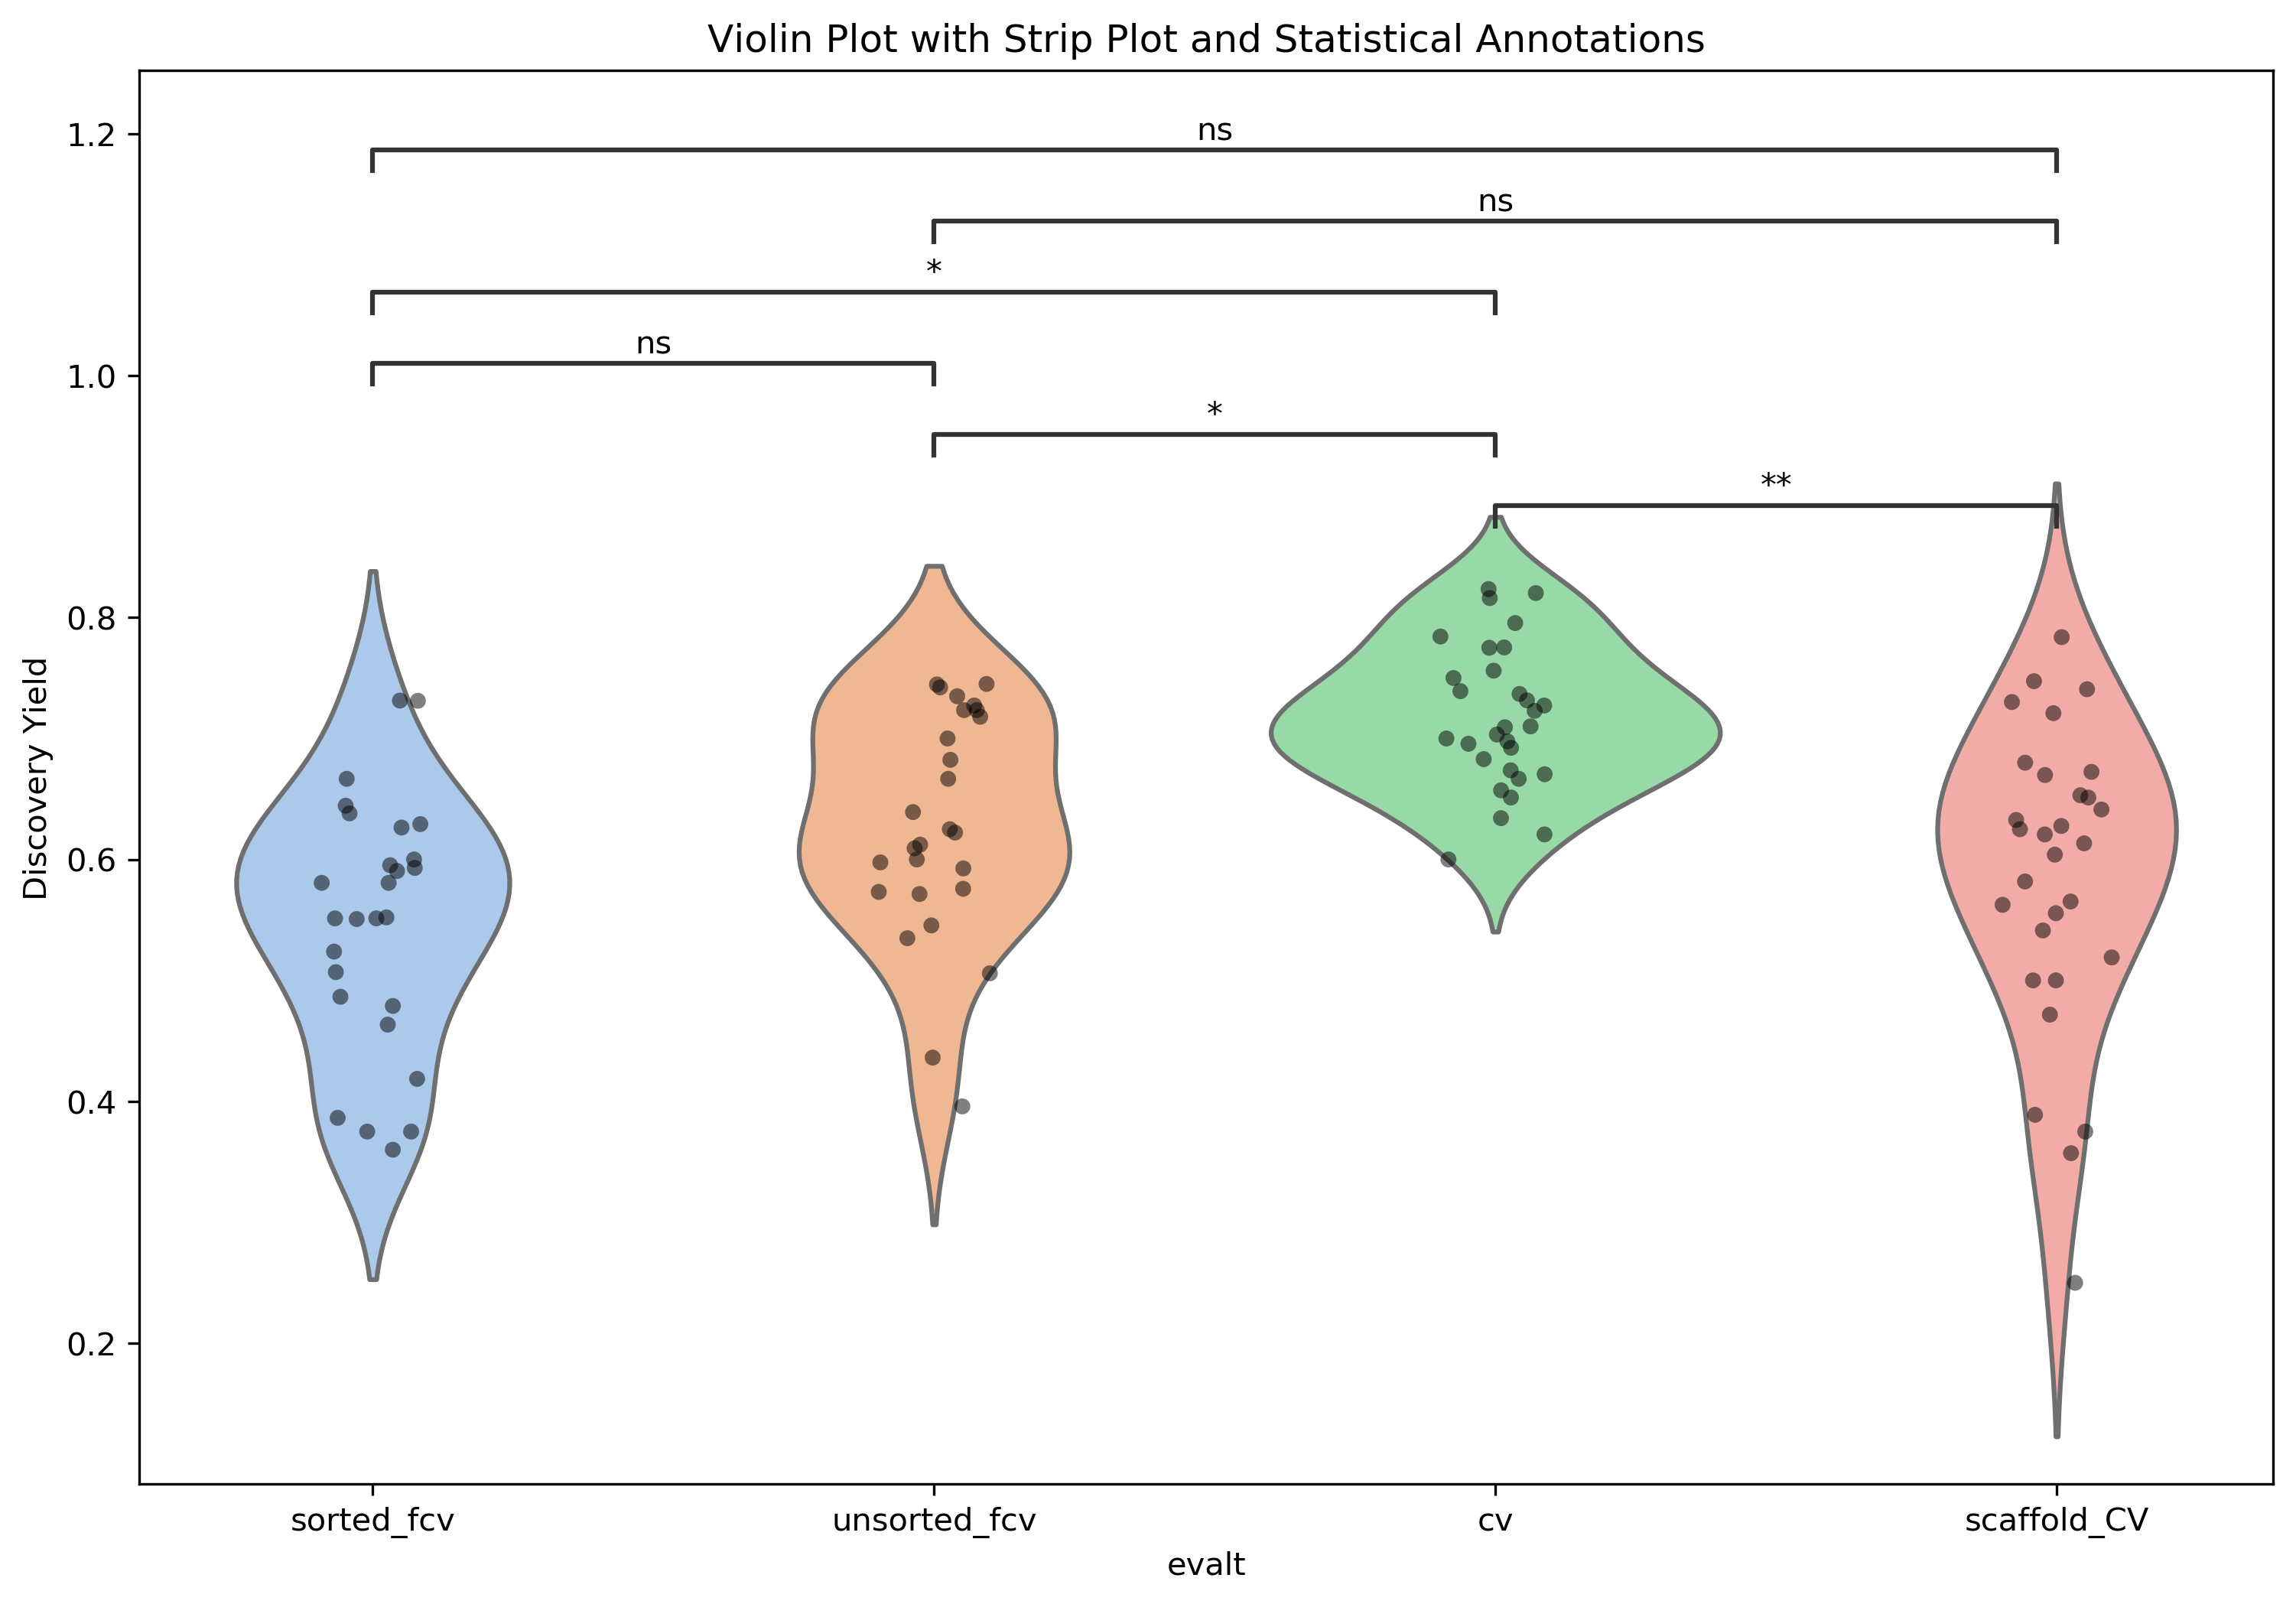

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

# Set up the matplotlib figure
plt.figure(figsize=(12, 8), dpi=300)

# Define the order of categories
order = ["sorted_fcv", "unsorted_fcv", "cv", "scaffold_CV"]

# Create violin plot with strip plot overlay
sns.violinplot(x="evalt", y="Discovery Yield", data=filtered_df, inner=None, palette="pastel", order=order)
sns.stripplot(x="evalt", y="Discovery Yield", data=filtered_df, jitter=True, color="black", alpha=0.5, order=order)

# Define pairs for statistical comparison
pairs = [
    ("cv", "scaffold_CV"),
    ("cv", "sorted_fcv"),
    ("cv", "unsorted_fcv"),
    ("scaffold_CV", "sorted_fcv"),
    ("scaffold_CV", "unsorted_fcv"),
    ("sorted_fcv", "unsorted_fcv")
]

# Create the annotator object
annotator = Annotator(plt.gca(), pairs, data=filtered_df, x="evalt", y="Discovery Yield", order=order)

# Perform t-test and add annotations
annotator.configure(test='Levene', text_format='star', loc='inside')
annotator.apply_and_annotate()

# Display the plot
plt.title("Violin Plot with Strip Plot and Statistical Annotations")
plt.show()
